<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/BoostingClassifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install numpy==1.24.3
!pip install  catboost

Hyperparameter Optimization Techniques and Libraries

 What Is Hyperparameter Tuning?

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us which can be manipulated according to programmer wish. Machine learning algorithms never learn these parameters. These are tuned so that we could get good performance by the model. Hyperparameter tuning aims to find such parameters where the performance of the model is highest or where the model performance is best and the error rate is least.

What Steps To Follow For Hyper Parameter Tuning?

1)Select the type of model we want to use

2) Check what are the parameters of the model.

3)Select the methods for searching the hyperparameter

4) Select the cross-validation approach

5) Evaluate the model using the score

There are several methods for hyperparameter tuning in machine learning, including:

Grid Search: Grid search involves defining a range of hyperparameter values and training the model on all possible combinations of these values. The performance of the model is evaluated on a validation set, and the best combination of hyperparameters is selected based on the highest performance.

Random Search: Random search involves defining a range of hyperparameter values and randomly sampling combinations of these values. The performance of the model is evaluated on a validation set, and the best combination of hyperparameters is selected based on the highest performance.

Bayesian Optimization: Bayesian optimization is a more sophisticated method for hyperparameter tuning. It involves constructing a probabilistic model of the objective function (i.e., the performance metric) and using this model to guide the search for optimal hyperparameters. Bayesian optimization is particularly useful when the search space for hyperparameters is large and complex.

Gradient-based Optimization: Gradient-based optimization involves optimizing the hyperparameters using gradient descent. This method is more computationally expensive than other methods, but it can be effective for complex models and high-dimensional hyperparameter spaces.

Ensemble-based Optimization: Ensemble-based optimization involves training multiple models with different hyperparameter settings and combining their predictions to make a final prediction. This method can be effective when the performance of individual models is highly variable across different hyperparameter settings.

Overall, the choice of hyperparameter tuning method depends on the specific problem and the size and complexity of the hyperparameter space.

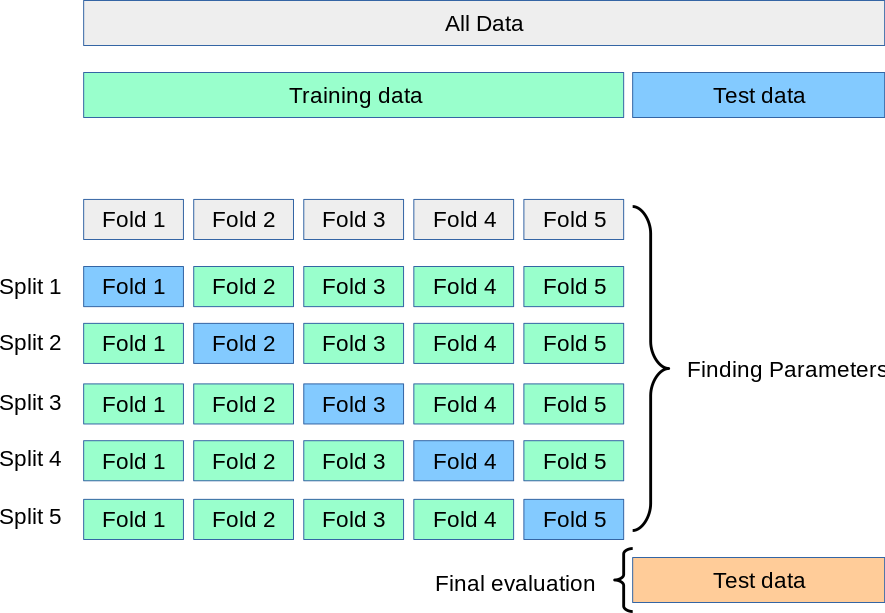

In [70]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"
df = pd.read_csv(DATA_PATH + "telecom_churn.csv")

df["International plan"] = pd.factorize(df["International plan"])[0]
df["Voice mail plan"] = pd.factorize(df["Voice mail plan"])[0]
df["Churn"] = df["Churn"].astype("int")
states = df["State"]
y = df["Churn"]
X=df.drop(["State", "Churn"], axis=1)


In [ ]:
X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [19]:
#split data into 2 parts:test and train
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17
)



# **Evaluation on Test Data with Default Parameters**

In [71]:
#Decison Tree
from sklearn.metrics import accuracy_score,confusion_matrix
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X_train, y_train)

# make predictions for test data
tree_pred = tree.predict(X_test)
print(accuracy_score(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))
sum(y_test)

0.9184652278177458
[[684  38]
 [ 30  82]]


112

In [72]:
#Random Forest
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=17 )
forest.fit(X_train, y_train)

# make predictions for test data

forest_pred = forest.predict(X_test)
print(accuracy_score(y_test, forest_pred) )
print(confusion_matrix(y_test, forest_pred))
sum(y_test)

0.9544364508393285
[[718   4]
 [ 34  78]]


112

In [73]:
# XGBoost
from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBClassifier
model = XGBClassifier(random_state=17)
model.fit(X_train, y_train)
# make predictions for test data
xgb_pred = model.predict(X_test)
print(accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
sum(y_test)

0.960431654676259
[[717   5]
 [ 28  84]]


112

In [74]:
#Light GBM
from sklearn.metrics import accuracy_score,confusion_matrix
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=17)
lgb_model.fit(X_train, y_train)
# make predictions for test data
print(accuracy_score(y_test, lgb_model.predict(X_test)))
print(confusion_matrix(y_test, lgb_model.predict(X_test)))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 371, number of negative: 2128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2381
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148459 -> initscore=-1.746736
[LightGBM] [Info] Start training from score -1.746736
0.9616306954436451
[[717   5]
 [ 27  85]]


In [75]:
#Gradient Boosting
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_model.fit(X_train, y_train)
print(accuracy_score(y_test, gbm_model.predict(X_test)))
print(confusion_matrix(y_test, gbm_model.predict(X_test)))


0.9484412470023981
[[711  11]
 [ 32  80]]


In [76]:
#Ada Boost
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=17)
ada.fit(X_train, y_train)
print(accuracy_score(y_test, ada.predict(X_test)))
print(confusion_matrix(y_test, ada.predict(X_test)))

0.8764988009592326
[[689  33]
 [ 70  42]]


In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix
import catboost  as cb
cab = cb.CatBoostClassifier(random_state=17)
cab.fit(X_train, y_train)
print(accuracy_score(y_test, cab.predict(X_test)))
print(confusion_matrix(y_test,cab.predict(X_test)))

Learning rate set to 0.015233
0:	learn: 0.6784352	total: 5.22ms	remaining: 5.21s
1:	learn: 0.6664651	total: 8.17ms	remaining: 4.08s
2:	learn: 0.6480540	total: 11ms	remaining: 3.65s
3:	learn: 0.6340844	total: 13.9ms	remaining: 3.47s
4:	learn: 0.6201517	total: 18.3ms	remaining: 3.65s
5:	learn: 0.6061646	total: 25.6ms	remaining: 4.25s
6:	learn: 0.5943686	total: 28.5ms	remaining: 4.04s
7:	learn: 0.5837860	total: 31.2ms	remaining: 3.87s
8:	learn: 0.5705723	total: 34ms	remaining: 3.74s
9:	learn: 0.5569539	total: 36.8ms	remaining: 3.65s
10:	learn: 0.5475894	total: 39.6ms	remaining: 3.56s
11:	learn: 0.5354485	total: 42.4ms	remaining: 3.49s
12:	learn: 0.5231970	total: 45.4ms	remaining: 3.45s
13:	learn: 0.5119833	total: 48.3ms	remaining: 3.4s
14:	learn: 0.5043035	total: 51.3ms	remaining: 3.37s
15:	learn: 0.4953731	total: 54.2ms	remaining: 3.33s
16:	learn: 0.4878081	total: 57.2ms	remaining: 3.31s
17:	learn: 0.4773137	total: 61.5ms	remaining: 3.35s
18:	learn: 0.4688412	total: 65.1ms	remaining: 3.3

Random Search CV

In [78]:
from time import time
t0=time()
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    "max_features": [2, 4, 6, 8, 10],
    "max_depth": [2, 4, 6, 8, 10]
}
forest = RandomForestClassifier(random_state=17 )
forest_grid = RandomizedSearchCV(forest, rf_params, cv=3, n_jobs=-1, verbose=True)
forest_grid.fit(X_train,y_train)

print(forest_grid.best_params_, forest_grid.best_score_)
print(accuracy_score(y_test, forest_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'max_features': 10, 'max_depth': 10} 0.9471788715486195
0.9520383693045563
Time is 12.498045206069946


Grid Search CV

In [66]:
#We can not choose model based on test data.
#Random Forest CV
from time import time
t0=time()
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_params =  {
    "max_features": [2, 4, 6, 8, 10],
    "max_depth": [2, 4, 6, 8, 10]
}

forest = RandomForestClassifier(random_state=17 )
forest_grid = GridSearchCV(forest, rf_params, cv=3, n_jobs=-1, verbose=True)
forest_grid.fit(X_train,y_train)

print(forest_grid.best_params_, forest_grid.best_score_)
print(accuracy_score(y_test, forest_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'max_depth': 10, 'max_features': 10} 0.9471788715486195
0.9520383693045563
Time is 26.74035906791687


In [67]:
#XGBoost CV
# XGBoost
%%time
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV, cross_val_score
xgb_params = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.3],
    "max_depth": [2, 4, 6, 8, 10]
}
xgbm = XGBClassifier(random_state=17)
xgb_grid = GridSearchCV(xgbm, xgb_params , cv=3, n_jobs=-1, verbose=True)
xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_params_, xgb_grid.best_score_)
print(accuracy_score(y_test, xgb_grid.predict(X_test)))



Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'learning_rate': 0.1, 'max_depth': 10} 0.9507803121248499
0.960431654676259
CPU times: user 739 ms, sys: 25.8 ms, total: 765 ms
Wall time: 11.5 s


In [68]:
#Light GBM CV
import lightgbm as lgb


from time import time
t0=time()
from sklearn.model_selection import GridSearchCV, cross_val_score
lgb_params =  {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.3],
    "max_depth": [2, 4, 6, 8, 10]
}
lgbm = lgb.LGBMClassifier(random_state=17)
lgb_grid = GridSearchCV(lgbm, lgb_params , cv=3, n_jobs=-1, verbose=True)
lgb_grid.fit(X_train,y_train)

print(lgb_grid.best_params_, lgb_grid.best_score_)
print(accuracy_score(y_test,lgb_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 371, number of negative: 2128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2381
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148459 -> initscore=-1.746736
[LightGBM] [Info] Start training from score -1.746736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [38]:
#Gradient Based CV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
gb_params = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.3],
    "max_depth": [2, 4, 6, 8, 10]
}
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_grid = GridSearchCV(gbm_model , gb_params , cv=3, n_jobs=-1, verbose=True)
gbm_grid.fit(X_train,y_train)

print(gbm_grid.best_params_, gbm_grid.best_score_)
print(accuracy_score(y_test,gbm_grid.predict(X_test)))
t1=time()
print('Time is ' +str(t1-t0))



Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'learning_rate': 0.05, 'max_depth': 4} 0.9479791916766707
0.960431654676259
Time is 155.26491713523865


In [ ]:
#Which model give  the highest CV
#and what is the accuracy result on test data?


Some of the popular libraries for hyper paramater optimization are optuna or hyperopt . You can check following link for comparison of two methods.

https://neptune.ai/blog/optuna-vs-hyperopt


By default, Optuna implements a Bayesian optimization algorithm named Tree-structured Parzen Estimator(TPE) but it can be easily switched to other existing algorithms in the package. The some of the other algorithms used by Optuna  are Grid Search, Random Search, CMA-ES based algortihm, Quasi Monte Carlo sampling algorithm  and Genetic Algorithm.

In [12]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.7 MB/s eta 0:00:00


In [ ]:
# Minimize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study()
study.optimize(objective, n_trials=20)

print(study.best_params) # E.g. {'x': 2.002108042}
print(study.best_trial)

[I 2023-03-09 07:07:28,141] A new study created in memory with name: no-name-8c76165e-5a28-4ef5-a12a-16b70434b966
[I 2023-03-09 07:07:28,147] Trial 0 finished with value: 1.524534590324041 and parameters: {'x': 0.7652795497263192}. Best is trial 0 with value: 1.524534590324041.
[I 2023-03-09 07:07:28,152] Trial 1 finished with value: 30.92562106047813 and parameters: {'x': 7.561080925546591}. Best is trial 0 with value: 1.524534590324041.
[I 2023-03-09 07:07:28,157] Trial 2 finished with value: 20.559765103039382 and parameters: {'x': -2.534287717275932}. Best is trial 0 with value: 1.524534590324041.
[I 2023-03-09 07:07:28,165] Trial 3 finished with value: 0.31206546713210426 and parameters: {'x': 1.441371798839242}. Best is trial 3 with value: 0.31206546713210426.
[I 2023-03-09 07:07:28,171] Trial 4 finished with value: 44.103777105185955 and parameters: {'x': -4.641067467296651}. Best is trial 3 with value: 0.31206546713210426.
[I 2023-03-09 07:07:28,185] Trial 5 finished with value

{'x': 2.543921202716674}
FrozenTrial(number=16, state=TrialState.COMPLETE, values=[0.2958502747647534], datetime_start=datetime.datetime(2023, 3, 9, 7, 7, 28, 362375), datetime_complete=datetime.datetime(2023, 3, 9, 7, 7, 28, 378703), params={'x': 2.543921202716674}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=16, value=None)


In [ ]:
# Maximize (x - 2) ** 2 if x is between ( -10, 10)
import optuna

def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2

study = optuna.create_study(direction="maximize")#We specify this is maximization problem
study.optimize(objective, n_trials=100)

print(study.best_params) # E.g. {'x':- 9.992108042}
print(study.best_trial)

[I 2023-03-09 07:09:15,440] A new study created in memory with name: no-name-ea943577-ee00-4398-a456-83ded315e209
[I 2023-03-09 07:09:15,447] Trial 0 finished with value: 75.22583661406205 and parameters: {'x': -6.673282920213202}. Best is trial 0 with value: 75.22583661406205.
[I 2023-03-09 07:09:15,453] Trial 1 finished with value: 2.721337810903737 and parameters: {'x': 0.35035221610680267}. Best is trial 0 with value: 75.22583661406205.
[I 2023-03-09 07:09:15,457] Trial 2 finished with value: 101.75547949088322 and parameters: {'x': -8.087392105538637}. Best is trial 2 with value: 101.75547949088322.
[I 2023-03-09 07:09:15,462] Trial 3 finished with value: 35.28623779421986 and parameters: {'x': -3.940222032400797}. Best is trial 2 with value: 101.75547949088322.
[I 2023-03-09 07:09:15,465] Trial 4 finished with value: 17.10180349566907 and parameters: {'x': -2.135432685423506}. Best is trial 2 with value: 101.75547949088322.
[I 2023-03-09 07:09:15,468] Trial 5 finished with value:

{'x': -9.99713259448614}
FrozenTrial(number=74, state=TrialState.COMPLETE, values=[143.9311904896817], datetime_start=datetime.datetime(2023, 3, 9, 7, 9, 16, 63461), datetime_complete=datetime.datetime(2023, 3, 9, 7, 9, 16, 70531), params={'x': -9.99713259448614}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=74, value=None)


In [59]:
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    x, y = X_train,y_train

    classifier_name = trial.suggest_categorical("classifier", ["Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier" ])
    if classifier_name == "Random Forest":
         from sklearn.ensemble import RandomForestClassifier
         rf_params = {
            "random_state": 17,
            "max_depth": trial.suggest_categorical("max_depth", [2, 4, 6, 8, 10]),
            "max_features": trial.suggest_categorical("max_features", [2, 4, 6, 8, 10])
         }
         classifier_obj = sklearn.ensemble.RandomForestClassifier(**rf_params)



    elif classifier_name == "XGBoost":
         from xgboost import XGBClassifier
         xgb_params ={
        "learning_rate": trial.suggest_categorical("learning_rate", [0.001, 0.01, 0.05, 0.1, 0.3]),
        "max_depth": trial.suggest_categorical("max_depth", [2, 4, 6, 8, 10]),
        "random_state": 17
        }
         classifier_obj = XGBClassifier(**xgb_params)



    elif classifier_name == "LightGBM":
         import lightgbm as lgb
         lgb_params = {
        "learning_rate": trial.suggest_categorical("learning_rate", [0.001, 0.01, 0.05, 0.1, 0.3]),
        "max_depth": trial.suggest_categorical("max_depth", [2, 4, 6, 8, 10]),
        "random_state": 17
        }

         classifier_obj = lgb.LGBMClassifier(**lgb_params)



    else:
         gb_params = {
        "learning_rate": trial.suggest_categorical("learning_rate", [0.001, 0.01, 0.05, 0.1, 0.3]),
        "max_depth": trial.suggest_categorical("max_depth", [2, 4, 6, 8, 10]),
        "random_state": 17
        }
         classifier_obj = sklearn.ensemble.GradientBoostingClassifier(**gb_params)



    accuracy=sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3).mean()

    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=40)
    print(study.best_trial)

[I 2025-04-02 05:30:54,054] A new study created in memory with name: no-name-55db79c5-6419-4f29-9838-3418907837a0
[I 2025-04-02 05:31:00,452] Trial 0 finished with value: 0.9059623849539816 and parameters: {'classifier': 'Random Forest', 'max_depth': 10, 'max_features': 2}. Best is trial 0 with value: 0.9059623849539816.
[I 2025-04-02 05:31:04,835] Trial 1 finished with value: 0.9323729491796718 and parameters: {'classifier': 'LightGBM', 'learning_rate': 0.01, 'max_depth': 8}. Best is trial 1 with value: 0.9323729491796718.
[I 2025-04-02 05:31:05,149] Trial 2 finished with value: 0.9499799919967987 and parameters: {'classifier': 'LightGBM', 'learning_rate': 0.05, 'max_depth': 10}. Best is trial 2 with value: 0.9499799919967987.
[I 2025-04-02 05:31:05,485] Trial 3 finished with value: 0.9499799919967987 and parameters: {'classifier': 'LightGBM', 'learning_rate': 0.05, 'max_depth': 10}. Best is trial 2 with value: 0.9499799919967987.
[I 2025-04-02 05:31:06,201] Trial 4 finished with valu

FrozenTrial(number=2, state=1, values=[0.9499799919967987], datetime_start=datetime.datetime(2025, 4, 2, 5, 31, 4, 836059), datetime_complete=datetime.datetime(2025, 4, 2, 5, 31, 5, 149730), params={'classifier': 'LightGBM', 'learning_rate': 0.05, 'max_depth': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('Random Forest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'learning_rate': CategoricalDistribution(choices=(0.001, 0.01, 0.05, 0.1, 0.3)), 'max_depth': CategoricalDistribution(choices=(2, 4, 6, 8, 10))}, trial_id=2, value=None)


In [60]:
#Print Best Model
study.best_params

{'classifier': 'LightGBM', 'learning_rate': 0.05, 'max_depth': 10}

In [61]:
#Light GBM Test Result with Best Parameters
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(**study.best_params)
lgb_model.fit(X_train, y_train)
# make predictions for test data
print(accuracy_score(y_test, lgb_model.predict(X_test)))
print(confusion_matrix(y_test, lgb_model.predict(X_test)))

[LightGBM] [Warning] Unknown parameter: classifier
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: classifier
[LightGBM] [Info] Number of positive: 371, number of negative: 2128
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2381
[LightGBM] [Info] Number of data points in the train set: 2499, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148459 -> initscore=-1.746736
[LightGBM] [Info] Start training from score -1.746736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: classifier
0.9640287769784173
[LightGBM] [Warning] Unknown para